# Map the Participants in the Summer School

## Imports

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [44]:
df = pd.read_csv("../../arm-summer-school-participants.csv").dropna()

In [45]:
df

,Name,Career Level,Institution,lat,lon
0,Angel Chui,PhD student,University of Washington,47.655548,-122.303200
1,Maggie,PhD student,Oak Ridge National Laboratory,35.931200,-84.310100
2,Rebecca Weinstein,PhD student,University of Virginia,38.033554,-78.507980
3,Kyra Britton,Masters student,University of Alabama in Huntsville,34.725200,-86.640500
4,Mirtha Allain Chavez,PhD student,Brookhaven National Lab,40.864300,-72.875200
5,Ruoyu Zhang,PhD student,University of Miami,25.717396,-80.278130
6,Shyheim Afanador,Masters student,Air Force Institute of Technology,39.782200,-84.083900
7,Sara Nielson,PhD student,Colorado State University,40.572900,-105.084800
8,Shan Gu,"Very early career researcher, within one year ...","University of California, Berkeley",37.871200,-122.255500
9,Ajmal Rasheeda Satheesh,PhD student,North Carolina State University,35.785100,-78.681300


In [46]:
df_instructors = df.loc[df["Career Level"].str.contains("Instructor")]
df_students = df.loc[~df["Career Level"].str.contains("Instructor")]

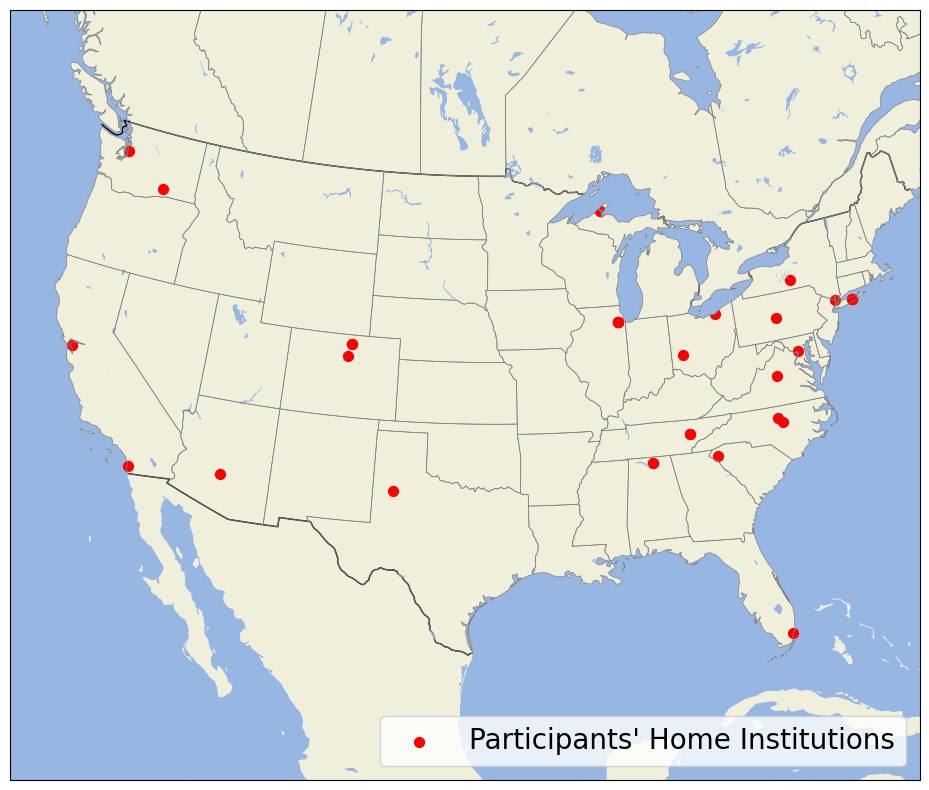

In [52]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111,
                 projection=ccrs.LambertConformal()
                )
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.STATES,
               linewidth=0.5,
               edgecolor='grey')

df.plot.scatter(x='lon',
                y='lat',
                c='red',
                label="Participants' Home Institutions",
                transform=ccrs.PlateCarree(),
                s=50,
                ax=ax)

ax.set_extent([-120, -75, 20, 55], crs=ccrs.PlateCarree())
ax.legend(fontsize=20, loc='lower right')
plt.tight_layout()
plt.savefig("bnf-participant-map.png", dpi=600)

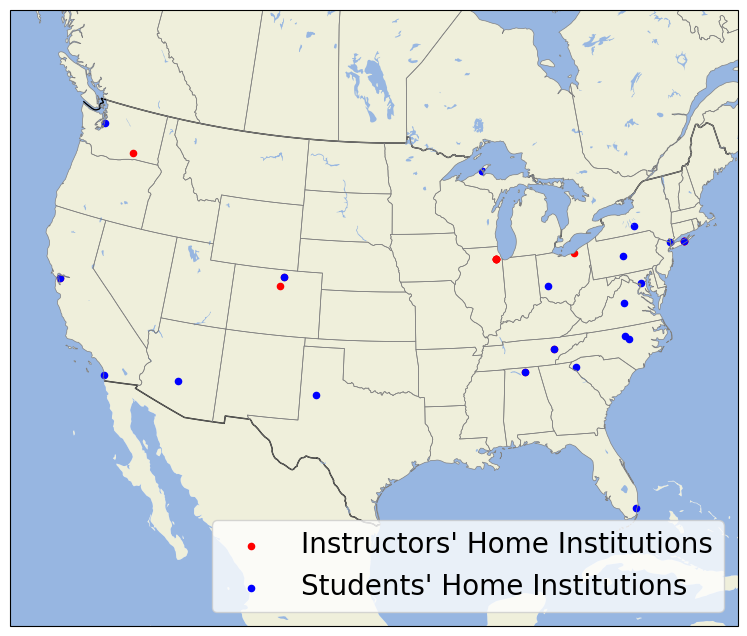

In [48]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111,
                 projection=ccrs.LambertConformal()
                )
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.STATES,
               linewidth=0.5,
               edgecolor='grey')

df_instructors.plot.scatter(x='lon',
                            y='lat',
                            c='red',
                            label="Instructors' Home Institutions",
                            transform=ccrs.PlateCarree(),
                            ax=ax)

df_students.plot.scatter(x='lon',
                         y='lat',
                         c='blue',
                         label="Students' Home Institutions",
                         transform=ccrs.PlateCarree(),
                         ax=ax)

ax.set_extent([-120, -75, 20, 55], crs=ccrs.PlateCarree())
ax.legend(fontsize=20, loc='lower right')

<Axes: xlabel='Institution'>

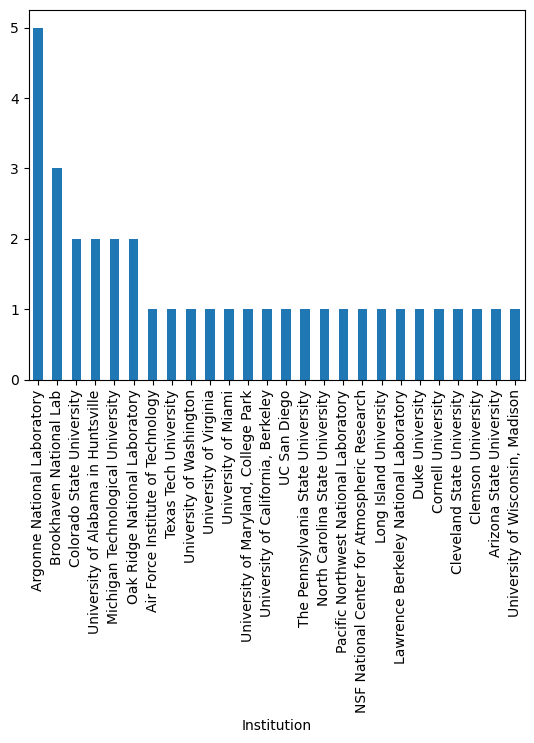

In [49]:
df.groupby("Institution").count()["Name"].sort_values(ascending=False).plot.bar()

In [53]:
len(df.groupby("Institution").count())

26